In [2]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
import matplotlib.cm as cm
from keras.optimizers import SGD
from keras.utils import to_categorical
from keras import losses
from sklearn.model_selection import train_test_split

from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
%matplotlib inline

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [4]:
print("O dataset MNIST tem %d exemplos de treino" % len(X_train))
print("O dataset MNIST tem %d exemplos de teste" % len(X_test))

O dataset MNIST tem 60000 exemplos de treino
O dataset MNIST tem 10000 exemplos de teste


# Plotando algumas imagens

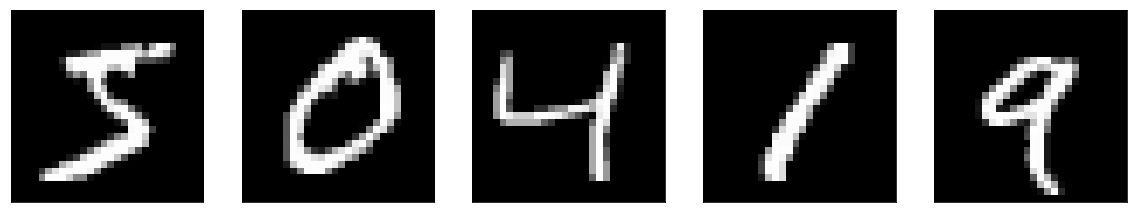

In [5]:
 fig = plt.figure(figsize=(20,20))
for i in range (5):
    im = fig.add_subplot(1, 5, i+1, xticks=[], yticks=[])
    im.imshow(X_train[i], cmap="gray")


# Escalando as imagens

In [6]:
# Escala [0,255] --> [0,1]
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255 

X_train[1].shape


(28, 28)

# Criando modelo

In [7]:

def create_model(p):
    model = Sequential()
    model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(Dropout(p))
    model.add(Flatten())
    model.add(Dense(units= 64, activation='relu'))
    model.add(Dense(units=10, activation='softmax'))
    return model

In [8]:
model = create_model(0.0)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                102464    
__________

In [9]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255
train_labels = to_categorical(train_labels) #Converts a class vector (integers) to binary class matrix.
test_labels = to_categorical(test_labels)

In [10]:

X_train = train_images[6000:50000, :, :]
X_train_labels = train_labels[6000:50000, :]

X_valid = train_images[1000:6000, :, :]
X_valid_labels= train_labels[1000:6000, :]

X_test = test_images[:1000, :, :]
X_test_labels = test_labels[:1000, :]

In [11]:
X_train.shape, X_train_labels.shape, X_valid.shape, X_valid_labels.shape, X_test.shape, X_test_labels.shape

((44000, 28, 28, 1),
 (44000, 10),
 (5000, 28, 28, 1),
 (5000, 10),
 (1000, 28, 28, 1),
 (1000, 10))

## optmizer = rmsprop  e loss =  categorical_crossentropy

In [12]:
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])
history = model.fit(X_train, X_train_labels, epochs=10, batch_size=64, validation_data=(X_valid, X_valid_labels))

Train on 44000 samples, validate on 5000 samples
Epoch 1/10
44000/44000 [==============================] - 11s 255us/step - loss: 0.2173 - acc: 0.9323 - val_loss: 0.0743 - val_acc: 0.9776
Epoch 2/10
44000/44000 [==============================] - 6s 142us/step - loss: 0.0650 - acc: 0.9800 - val_loss: 0.0467 - val_acc: 0.9846
Epoch 3/10
44000/44000 [==============================] - 6s 141us/step - loss: 0.0419 - acc: 0.9866 - val_loss: 0.0376 - val_acc: 0.9890
Epoch 4/10
44000/44000 [==============================] - 6s 141us/step - loss: 0.0315 - acc: 0.9900 - val_loss: 0.0398 - val_acc: 0.9876
Epoch 5/10
44000/44000 [==============================] - 6s 142us/step - loss: 0.0238 - acc: 0.9927 - val_loss: 0.0407 - val_acc: 0.9878
Epoch 6/10
44000/44000 [==============================] - 6s 140us/step - loss: 0.0195 - acc: 0.9937 - val_loss: 0.0295 - val_acc: 0.9924
Epoch 7/10
44000/44000 [==============================] - 6s 141us/step - loss: 0.0144 - acc: 0.9958 - val_loss: 0.0341 - 

In [15]:
def plot(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)
    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.figure()
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    plt.show()

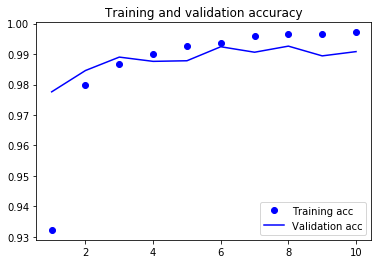

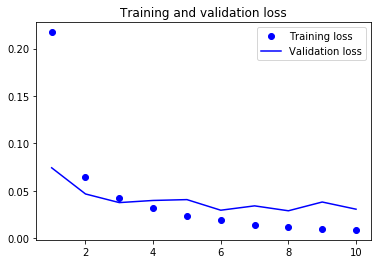

In [16]:
plot(history)

## optmizer = SGD e loss =  categorical_crossentropy

In [17]:
sgd = SGD(lr=1e-3, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(optimizer=sgd,
loss='categorical_crossentropy',
metrics=['accuracy'])
history = model.fit(X_train, X_train_labels, epochs=10, batch_size=64, validation_data=(X_valid, X_valid_labels))

Train on 44000 samples, validate on 5000 samples
Epoch 1/10
44000/44000 [==============================] - 6s 140us/step - loss: 0.0026 - acc: 0.9995 - val_loss: 0.0281 - val_acc: 0.9908
Epoch 2/10
44000/44000 [==============================] - 6s 134us/step - loss: 0.0021 - acc: 0.9995 - val_loss: 0.0283 - val_acc: 0.9908
Epoch 3/10
44000/44000 [==============================] - 6s 135us/step - loss: 0.0019 - acc: 0.9995 - val_loss: 0.0282 - val_acc: 0.9910
Epoch 4/10
44000/44000 [==============================] - 6s 134us/step - loss: 0.0017 - acc: 0.9996 - val_loss: 0.0284 - val_acc: 0.9910
Epoch 5/10
44000/44000 [==============================] - 6s 135us/step - loss: 0.0016 - acc: 0.9995 - val_loss: 0.0283 - val_acc: 0.9912
Epoch 6/10
44000/44000 [==============================] - 6s 134us/step - loss: 0.0015 - acc: 0.9996 - val_loss: 0.0288 - val_acc: 0.9908
Epoch 7/10
44000/44000 [==============================] - 6s 135us/step - loss: 0.0014 - acc: 0.9996 - val_loss: 0.0287 - v

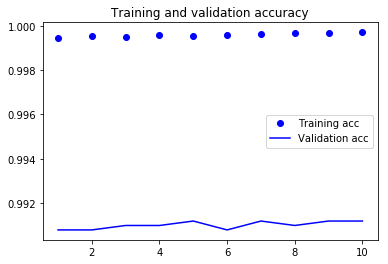

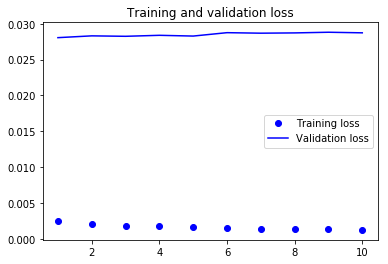

In [18]:
plot(history)

## optmizer = SGDe loss =  categorical_hinge

In [19]:
sgd = SGD(lr=1e-3, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(optimizer=sgd,
loss=losses.categorical_hinge,
metrics=['accuracy'])
history = model.fit(X_train, X_train_labels, epochs=10, batch_size=64, validation_data=(X_valid, X_valid_labels))

Train on 44000 samples, validate on 5000 samples
Epoch 1/10
44000/44000 [==============================] - 6s 140us/step - loss: 0.0016 - acc: 0.9997 - val_loss: 0.0178 - val_acc: 0.9918
Epoch 2/10
44000/44000 [==============================] - 6s 134us/step - loss: 0.0015 - acc: 0.9997 - val_loss: 0.0176 - val_acc: 0.9916
Epoch 3/10
44000/44000 [==============================] - 6s 134us/step - loss: 0.0014 - acc: 0.9997 - val_loss: 0.0175 - val_acc: 0.9922
Epoch 4/10
44000/44000 [==============================] - 6s 134us/step - loss: 0.0014 - acc: 0.9997 - val_loss: 0.0174 - val_acc: 0.9920
Epoch 5/10
44000/44000 [==============================] - 6s 135us/step - loss: 0.0013 - acc: 0.9998 - val_loss: 0.0173 - val_acc: 0.9922
Epoch 6/10
44000/44000 [==============================] - 6s 134us/step - loss: 0.0013 - acc: 0.9998 - val_loss: 0.0173 - val_acc: 0.9922
Epoch 7/10
44000/44000 [==============================] - 6s 135us/step - loss: 0.0012 - acc: 0.9998 - val_loss: 0.0173 - v

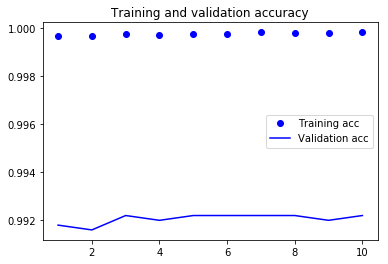

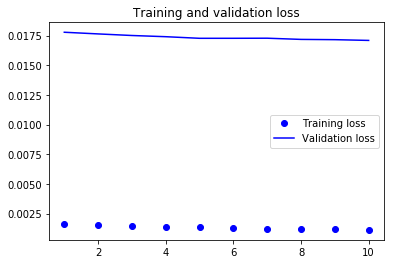

In [20]:
plot(history)

## optmizer = SGD  e loss =  mean_absolute_error

In [21]:
sgd = SGD(lr=1e-3, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(optimizer=sgd,
loss=losses.mean_absolute_error,
metrics=['accuracy'])
history = model.fit(X_train, X_train_labels, epochs=10, batch_size=64, validation_data=(X_valid, X_valid_labels))

Train on 44000 samples, validate on 5000 samples
Epoch 1/10
44000/44000 [==============================] - 6s 138us/step - loss: 1.1011e-04 - acc: 0.9999 - val_loss: 0.0017 - val_acc: 0.9922
Epoch 2/10
44000/44000 [==============================] - 6s 133us/step - loss: 1.0961e-04 - acc: 0.9999 - val_loss: 0.0017 - val_acc: 0.9922
Epoch 3/10
44000/44000 [==============================] - 6s 133us/step - loss: 1.0921e-04 - acc: 0.9999 - val_loss: 0.0017 - val_acc: 0.9922
Epoch 4/10
44000/44000 [==============================] - 6s 134us/step - loss: 1.0888e-04 - acc: 0.9999 - val_loss: 0.0017 - val_acc: 0.9922
Epoch 5/10
44000/44000 [==============================] - 6s 134us/step - loss: 1.0851e-04 - acc: 0.9999 - val_loss: 0.0017 - val_acc: 0.9922
Epoch 6/10
44000/44000 [==============================] - 6s 133us/step - loss: 1.0819e-04 - acc: 0.9999 - val_loss: 0.0017 - val_acc: 0.9922
Epoch 7/10
44000/44000 [==============================] - 6s 134us/step - loss: 1.0781e-04 - acc: 0

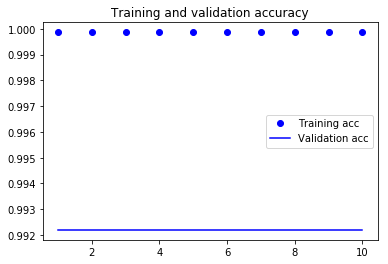

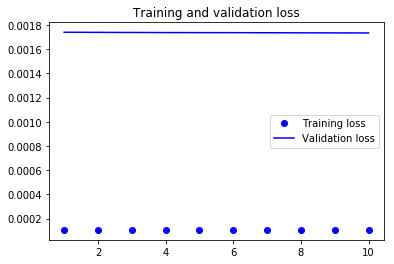

In [22]:
plot(history)

## optmizer = ADELTA  e loss =  mean_absolute_error

In [23]:
adelta = keras.optimizers.Adadelta(lr=1.0, rho=0.95, epsilon=None, decay=0.0)

In [24]:
model.compile(optimizer=adelta,
loss=losses.mean_absolute_error,
metrics=['accuracy'])
history = model.fit(X_train, X_train_labels, epochs=10, batch_size=64, validation_data=(X_valid, X_valid_labels))

Train on 44000 samples, validate on 5000 samples
Epoch 1/10
44000/44000 [==============================] - 7s 159us/step - loss: 1.2623e-04 - acc: 0.9997 - val_loss: 0.0017 - val_acc: 0.9920
Epoch 2/10
44000/44000 [==============================] - 7s 151us/step - loss: 9.6562e-05 - acc: 0.9998 - val_loss: 0.0017 - val_acc: 0.9924
Epoch 3/10
44000/44000 [==============================] - 7s 150us/step - loss: 8.4601e-05 - acc: 0.9998 - val_loss: 0.0016 - val_acc: 0.9934
Epoch 4/10
44000/44000 [==============================] - 7s 150us/step - loss: 6.9894e-05 - acc: 0.9999 - val_loss: 0.0017 - val_acc: 0.9932
Epoch 5/10
44000/44000 [==============================] - 7s 151us/step - loss: 6.0466e-05 - acc: 0.9999 - val_loss: 0.0016 - val_acc: 0.9926
Epoch 6/10
44000/44000 [==============================] - 7s 151us/step - loss: 5.3579e-05 - acc: 0.9999 - val_loss: 0.0016 - val_acc: 0.9932
Epoch 7/10
44000/44000 [==============================] - 7s 151us/step - loss: 4.6494e-05 - acc: 0

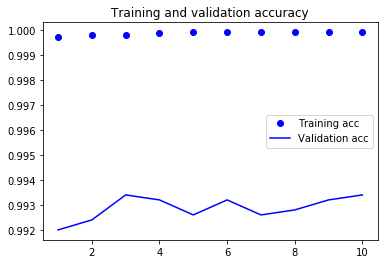

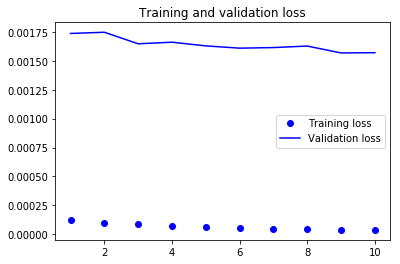

In [25]:
plot(history)

## optmizer = SGD  e loss =  cosine_proximity

In [26]:
model.compile(optimizer=sgd,
loss=keras.losses.cosine_proximity,
metrics=['accuracy'])
history = model.fit(X_train, X_train_labels, epochs=10, batch_size=64, validation_data=(X_valid, X_valid_labels))

Train on 44000 samples, validate on 5000 samples
Epoch 1/10
44000/44000 [==============================] - 6s 143us/step - loss: -0.9999 - acc: 0.9999 - val_loss: -0.9935 - val_acc: 0.9934
Epoch 2/10
44000/44000 [==============================] - 6s 135us/step - loss: -0.9999 - acc: 0.9999 - val_loss: -0.9935 - val_acc: 0.9936
Epoch 3/10
44000/44000 [==============================] - 6s 135us/step - loss: -0.9999 - acc: 0.9999 - val_loss: -0.9935 - val_acc: 0.9936
Epoch 4/10
44000/44000 [==============================] - 6s 136us/step - loss: -0.9999 - acc: 0.9999 - val_loss: -0.9936 - val_acc: 0.9936
Epoch 5/10
44000/44000 [==============================] - 6s 135us/step - loss: -0.9999 - acc: 0.9999 - val_loss: -0.9936 - val_acc: 0.9936
Epoch 6/10
44000/44000 [==============================] - 6s 140us/step - loss: -0.9999 - acc: 0.9999 - val_loss: -0.9936 - val_acc: 0.9936
Epoch 7/10
44000/44000 [==============================] - 6s 135us/step - loss: -0.9999 - acc: 0.9999 - val_los

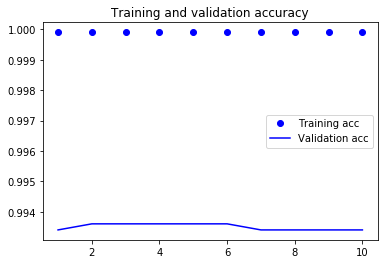

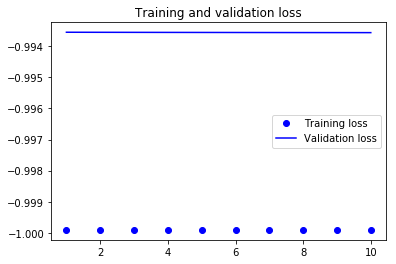

In [27]:
plot(history)

In [28]:
datagen = ImageDataGenerator(
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,
fill_mode='nearest')



train_datagen = ImageDataGenerator(
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,)


## optmizer = SGD, loss =  categorical_crossentropy e  p = 0.3

In [29]:
model = create_model(0.3)
def compiler(model):
    sgd = SGD(lr=1e-3, decay=1e-6, momentum=0.9, nesterov=True)
    model.compile(optimizer=sgd,
    loss=losses.categorical_crossentropy,
    metrics=['accuracy'])
    return model

In [32]:
model = compiler(model)
history = model.fit_generator(datagen.flow(X_train, X_train_labels, batch_size=20), epochs=100, 
                                validation_data=(X_valid, X_valid_labels))

Epoch 1/100
2200/2200 [==============================] - 27s 12ms/step - loss: 1.6153 - acc: 0.4337 - val_loss: 0.8055 - val_acc: 0.7930
Epoch 2/100
2200/2200 [==============================] - 27s 12ms/step - loss: 1.2610 - acc: 0.5722 - val_loss: 0.6374 - val_acc: 0.8174
Epoch 3/100
2200/2200 [==============================] - 27s 12ms/step - loss: 1.0596 - acc: 0.6455 - val_loss: 0.6174 - val_acc: 0.8252
Epoch 4/100
2200/2200 [==============================] - 27s 12ms/step - loss: 0.9279 - acc: 0.6906 - val_loss: 0.4940 - val_acc: 0.8594
Epoch 5/100
2200/2200 [==============================] - 27s 12ms/step - loss: 0.8481 - acc: 0.7172 - val_loss: 0.4347 - val_acc: 0.8776
Epoch 6/100
2200/2200 [==============================] - 27s 12ms/step - loss: 0.7702 - acc: 0.7445 - val_loss: 0.4833 - val_acc: 0.8690
Epoch 7/100
2200/2200 [==============================] - 27s 12ms/step - loss: 0.7204 - acc: 0.7631 - val_loss: 0.3160 - val_acc: 0.9194
Epoch 8/100
2200/2200 [==================

2200/2200 [==============================] - 27s 12ms/step - loss: 0.2509 - acc: 0.9215 - val_loss: 0.0904 - val_acc: 0.9742
Epoch 61/100
2200/2200 [==============================] - 27s 12ms/step - loss: 0.2472 - acc: 0.9218 - val_loss: 0.1084 - val_acc: 0.9678
Epoch 62/100
2200/2200 [==============================] - 27s 12ms/step - loss: 0.2467 - acc: 0.9232 - val_loss: 0.1222 - val_acc: 0.9660
Epoch 63/100
2200/2200 [==============================] - 27s 12ms/step - loss: 0.2455 - acc: 0.9218 - val_loss: 0.0915 - val_acc: 0.9742
Epoch 64/100
2200/2200 [==============================] - 27s 12ms/step - loss: 0.2426 - acc: 0.9237 - val_loss: 0.1048 - val_acc: 0.9692
Epoch 65/100
2200/2200 [==============================] - 27s 12ms/step - loss: 0.2449 - acc: 0.9245 - val_loss: 0.0888 - val_acc: 0.9722
Epoch 66/100
2200/2200 [==============================] - 27s 12ms/step - loss: 0.2379 - acc: 0.9236 - val_loss: 0.1227 - val_acc: 0.9636
Epoch 67/100
2200/2200 [=======================

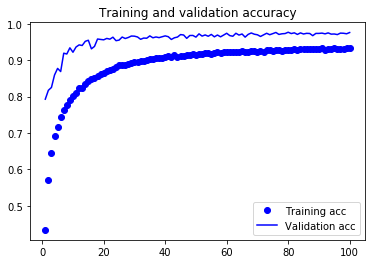

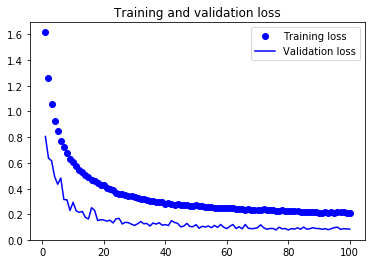

In [33]:
plot(history)

## optmizer = SGD, loss =  categorical_crossentropy e  p = 0.4

In [34]:
model = create_model(0.4)
sgd = SGD(lr=1e-3, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(optimizer=sgd,
loss=losses.categorical_crossentropy,
metrics=['accuracy'])
history = model.fit_generator(datagen.flow(X_train, X_train_labels, batch_size=20), epochs=100,
                                validation_data=(X_valid, X_valid_labels))

Epoch 1/100
2200/2200 [==============================] - 27s 12ms/step - loss: 2.1543 - acc: 0.2084 - val_loss: 1.5230 - val_acc: 0.5768
Epoch 2/100
2200/2200 [==============================] - 27s 12ms/step - loss: 1.6855 - acc: 0.4048 - val_loss: 0.8536 - val_acc: 0.7768
Epoch 3/100
2200/2200 [==============================] - 27s 12ms/step - loss: 1.2992 - acc: 0.5595 - val_loss: 0.6990 - val_acc: 0.7982
Epoch 4/100
2200/2200 [==============================] - 27s 12ms/step - loss: 1.0978 - acc: 0.6333 - val_loss: 0.4921 - val_acc: 0.8684
Epoch 5/100
2200/2200 [==============================] - 27s 12ms/step - loss: 0.9761 - acc: 0.6750 - val_loss: 0.4219 - val_acc: 0.8854
Epoch 6/100
2200/2200 [==============================] - 27s 12ms/step - loss: 0.8787 - acc: 0.7067 - val_loss: 0.4045 - val_acc: 0.8906
Epoch 7/100
2200/2200 [==============================] - 27s 12ms/step - loss: 0.8167 - acc: 0.7283 - val_loss: 0.3872 - val_acc: 0.8934
Epoch 8/100
2200/2200 [==================

2200/2200 [==============================] - 27s 12ms/step - loss: 0.2848 - acc: 0.9104 - val_loss: 0.0845 - val_acc: 0.9744
Epoch 61/100
2200/2200 [==============================] - 27s 12ms/step - loss: 0.2787 - acc: 0.9121 - val_loss: 0.1077 - val_acc: 0.9668
Epoch 62/100
2200/2200 [==============================] - 27s 12ms/step - loss: 0.2762 - acc: 0.9132 - val_loss: 0.0921 - val_acc: 0.9730
Epoch 63/100
2200/2200 [==============================] - 27s 12ms/step - loss: 0.2675 - acc: 0.9166 - val_loss: 0.0945 - val_acc: 0.9722
Epoch 64/100
2200/2200 [==============================] - 27s 12ms/step - loss: 0.2716 - acc: 0.9150 - val_loss: 0.1071 - val_acc: 0.9680
Epoch 65/100
2200/2200 [==============================] - 27s 12ms/step - loss: 0.2694 - acc: 0.9135 - val_loss: 0.0887 - val_acc: 0.9722
Epoch 66/100
2200/2200 [==============================] - 27s 12ms/step - loss: 0.2708 - acc: 0.9139 - val_loss: 0.0926 - val_acc: 0.9736
Epoch 67/100
2200/2200 [=======================

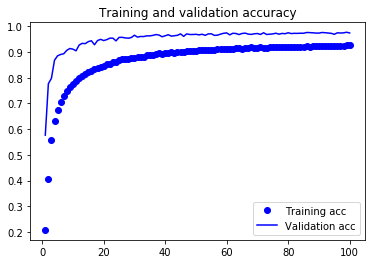

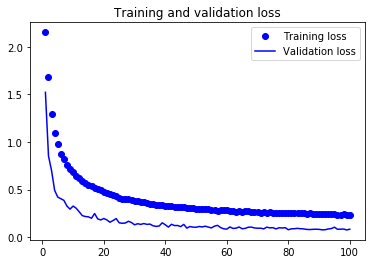

In [35]:
plot(history)

## optmizer = SGD, loss =  categorical_crossentropy e  p = 0.5

In [36]:
model = create_model(0.5)
sgd = SGD(lr=1e-3, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(optimizer=sgd,
loss=losses.categorical_crossentropy,
metrics=['accuracy'])
history = model.fit_generator(datagen.flow(X_train, X_train_labels, batch_size=20), epochs=100,
                                validation_data=(X_valid, X_valid_labels))

Epoch 1/100
2200/2200 [==============================] - 27s 12ms/step - loss: 2.1472 - acc: 0.2112 - val_loss: 1.4503 - val_acc: 0.6204
Epoch 2/100
2200/2200 [==============================] - 27s 12ms/step - loss: 1.6912 - acc: 0.3999 - val_loss: 0.9348 - val_acc: 0.7220
Epoch 3/100
2200/2200 [==============================] - 26s 12ms/step - loss: 1.3356 - acc: 0.5412 - val_loss: 0.7835 - val_acc: 0.7796
Epoch 4/100
2200/2200 [==============================] - 26s 12ms/step - loss: 1.1489 - acc: 0.6123 - val_loss: 0.6222 - val_acc: 0.8286
Epoch 5/100
2200/2200 [==============================] - 26s 12ms/step - loss: 1.0249 - acc: 0.6536 - val_loss: 0.5726 - val_acc: 0.8202
Epoch 6/100
2200/2200 [==============================] - 26s 12ms/step - loss: 0.9385 - acc: 0.6862 - val_loss: 0.4552 - val_acc: 0.8642
Epoch 7/100
2200/2200 [==============================] - 26s 12ms/step - loss: 0.8614 - acc: 0.7095 - val_loss: 0.4627 - val_acc: 0.8644
Epoch 8/100
2200/2200 [==================

2200/2200 [==============================] - 26s 12ms/step - loss: 0.3185 - acc: 0.8998 - val_loss: 0.1113 - val_acc: 0.9700
Epoch 61/100
2200/2200 [==============================] - 27s 12ms/step - loss: 0.3204 - acc: 0.8986 - val_loss: 0.1036 - val_acc: 0.9694
Epoch 62/100
2200/2200 [==============================] - 26s 12ms/step - loss: 0.3089 - acc: 0.9025 - val_loss: 0.1163 - val_acc: 0.9658
Epoch 63/100
2200/2200 [==============================] - 26s 12ms/step - loss: 0.3073 - acc: 0.9024 - val_loss: 0.1026 - val_acc: 0.9716
Epoch 64/100
2200/2200 [==============================] - 26s 12ms/step - loss: 0.3019 - acc: 0.9036 - val_loss: 0.1161 - val_acc: 0.9674
Epoch 65/100
2200/2200 [==============================] - 26s 12ms/step - loss: 0.3038 - acc: 0.9035 - val_loss: 0.1098 - val_acc: 0.9684
Epoch 66/100
2200/2200 [==============================] - 26s 12ms/step - loss: 0.3052 - acc: 0.9037 - val_loss: 0.1117 - val_acc: 0.9684
Epoch 67/100
2200/2200 [=======================

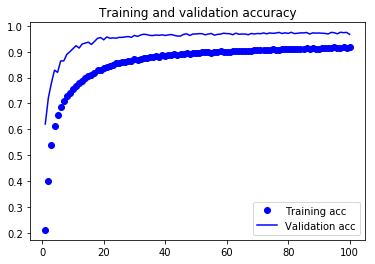

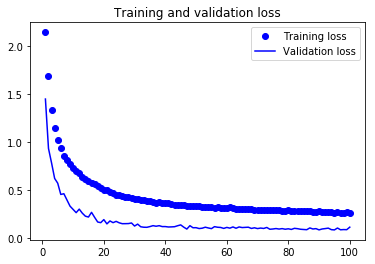

In [37]:
plot(history)